# Data Understanding

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import seaborn as sns


In [3]:
df_sessions = pd.read_csv('data/ga_sessions.csv')
df_hits = pd.read_csv('data/ga_hits.csv')

/var/folders/3s/h4tbdn8n3bg8g9r44dkph73w0000gn/T/ipykernel_26931/2144210169.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('data/ga_sessions.csv')


In [4]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [6]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [7]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [8]:
# Merge two tables into one based on common features

In [9]:
merged_df = pd.merge(df_sessions, df_hits, left_on=['session_id', 'visit_date'], right_on=['session_id', 'hit_date'], how='inner')

In [10]:
# Remove duplicates

In [11]:
merged_df = merged_df.drop_duplicates(subset=['session_id', 'hit_date'], keep='first')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732266 entries, 0 to 15685206
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  hit_date                  object 
 19  hit_time                  float64
 20  hit_number                in

In [13]:
merged_df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,2021-11-14,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,NaN
19,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,...,2021-05-29,NaN,2,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
22,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,...,2021-05-29,NaN,3,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,quiz_show,KclpemfoHstknWHFiLit,NaN


# Data Preparation

### Drop columns

In [16]:
if merged_df['visit_date'].equals(merged_df['hit_date']):
    print("Все значения идентичны")
else:
    print("Есть различия")

Все значения идентичны


In [17]:
merged_df = merged_df.drop(columns=['visit_date'])

In [18]:
merged_df.session_id.nunique()

1732266

In [19]:
df_cleaned = merged_df.drop(columns=['visit_number', 'visit_time', 'client_id', 'session_id',
                                           'hit_date', 'hit_time', 'hit_number', 'hit_type', 'hit_referer', 'hit_page_path',
                                           'event_category', 'event_label', 'event_value'])

In [20]:
df_cleaned.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,sub_landing
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,sub_landing
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,search_form_region
19,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,sub_landing
22,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,quiz_show


In [21]:
df_cleaned[df_cleaned.event_action == 'sub_car_claim_click']

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
25890,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Huawei,NaN,360x720,Chrome,Russia,Moscow,sub_car_claim_click
42969,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x667,Safari,Russia,Moscow,sub_car_claim_click
76767,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,320x694,Chrome,Russia,Saint Petersburg,sub_car_claim_click
81974,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,414x896,Safari,Russia,Moscow,sub_car_claim_click
94133,bByPQxmDaMXgpHeypKSM,referral,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow,sub_car_claim_click
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571355,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,339x753,Chrome,Russia,Moscow,sub_car_claim_click
15594564,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,NaN,393x873,Chrome,Russia,Moscow,sub_car_claim_click
15634483,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Grozny,sub_car_claim_click
15653984,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,NaN,1280x800,Chrome,Russia,Moscow,sub_car_claim_click


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732266 entries, 0 to 15685206
Data columns (total 14 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   utm_source                object
 1   utm_medium                object
 2   utm_campaign              object
 3   utm_adcontent             object
 4   utm_keyword               object
 5   device_category           object
 6   device_os                 object
 7   device_brand              object
 8   device_model              object
 9   device_screen_resolution  object
 10  device_browser            object
 11  geo_country               object
 12  geo_city                  object
 13  event_action              object
dtypes: object(14)
memory usage: 198.2+ MB


### Data cleaning

In [24]:
# Start processing our data
# Remove duplicates and save the table for further use in modeling

In [25]:
df_cleaned[df_cleaned.duplicated()]

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,event_action
118,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow,sub_landing
224,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,sub_landing
225,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,sub_landing
226,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,sub_landing
227,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,NaN,mobile,NaN,Xiaomi,NaN,393x851,Chrome,Russia,Moscow,sub_landing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685093,kjsLglQLzykiRbcDiGcD,cpc,RoDitORHdzGfGhNCyEMy,NaN,jPLfhIDoTujxnCRtjIfc,mobile,iOS,Apple,NaN,428x926,Safari,Russia,Moscow,sub_landing
15685152,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,sub_landing
15685163,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,view_card
15685204,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,sub_landing


In [26]:
df_cleaned = df_cleaned.drop_duplicates()

In [27]:
df_cleaned.to_csv("data/df_ready.csv", index=False)

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   utm_source                657465 non-null  object
 1   utm_medium                657522 non-null  object
 2   utm_campaign              581642 non-null  object
 3   utm_adcontent             534277 non-null  object
 4   utm_keyword               324372 non-null  object
 5   device_category           657522 non-null  object
 6   device_os                 327860 non-null  object
 7   device_brand              512735 non-null  object
 8   device_model              11915 non-null   object
 9   device_screen_resolution  657522 non-null  object
 10  device_browser            657522 non-null  object
 11  geo_country               657522 non-null  object
 12  geo_city                  657522 non-null  object
 13  event_action              657522 non-null  object
dtypes: obje

<Axes: >

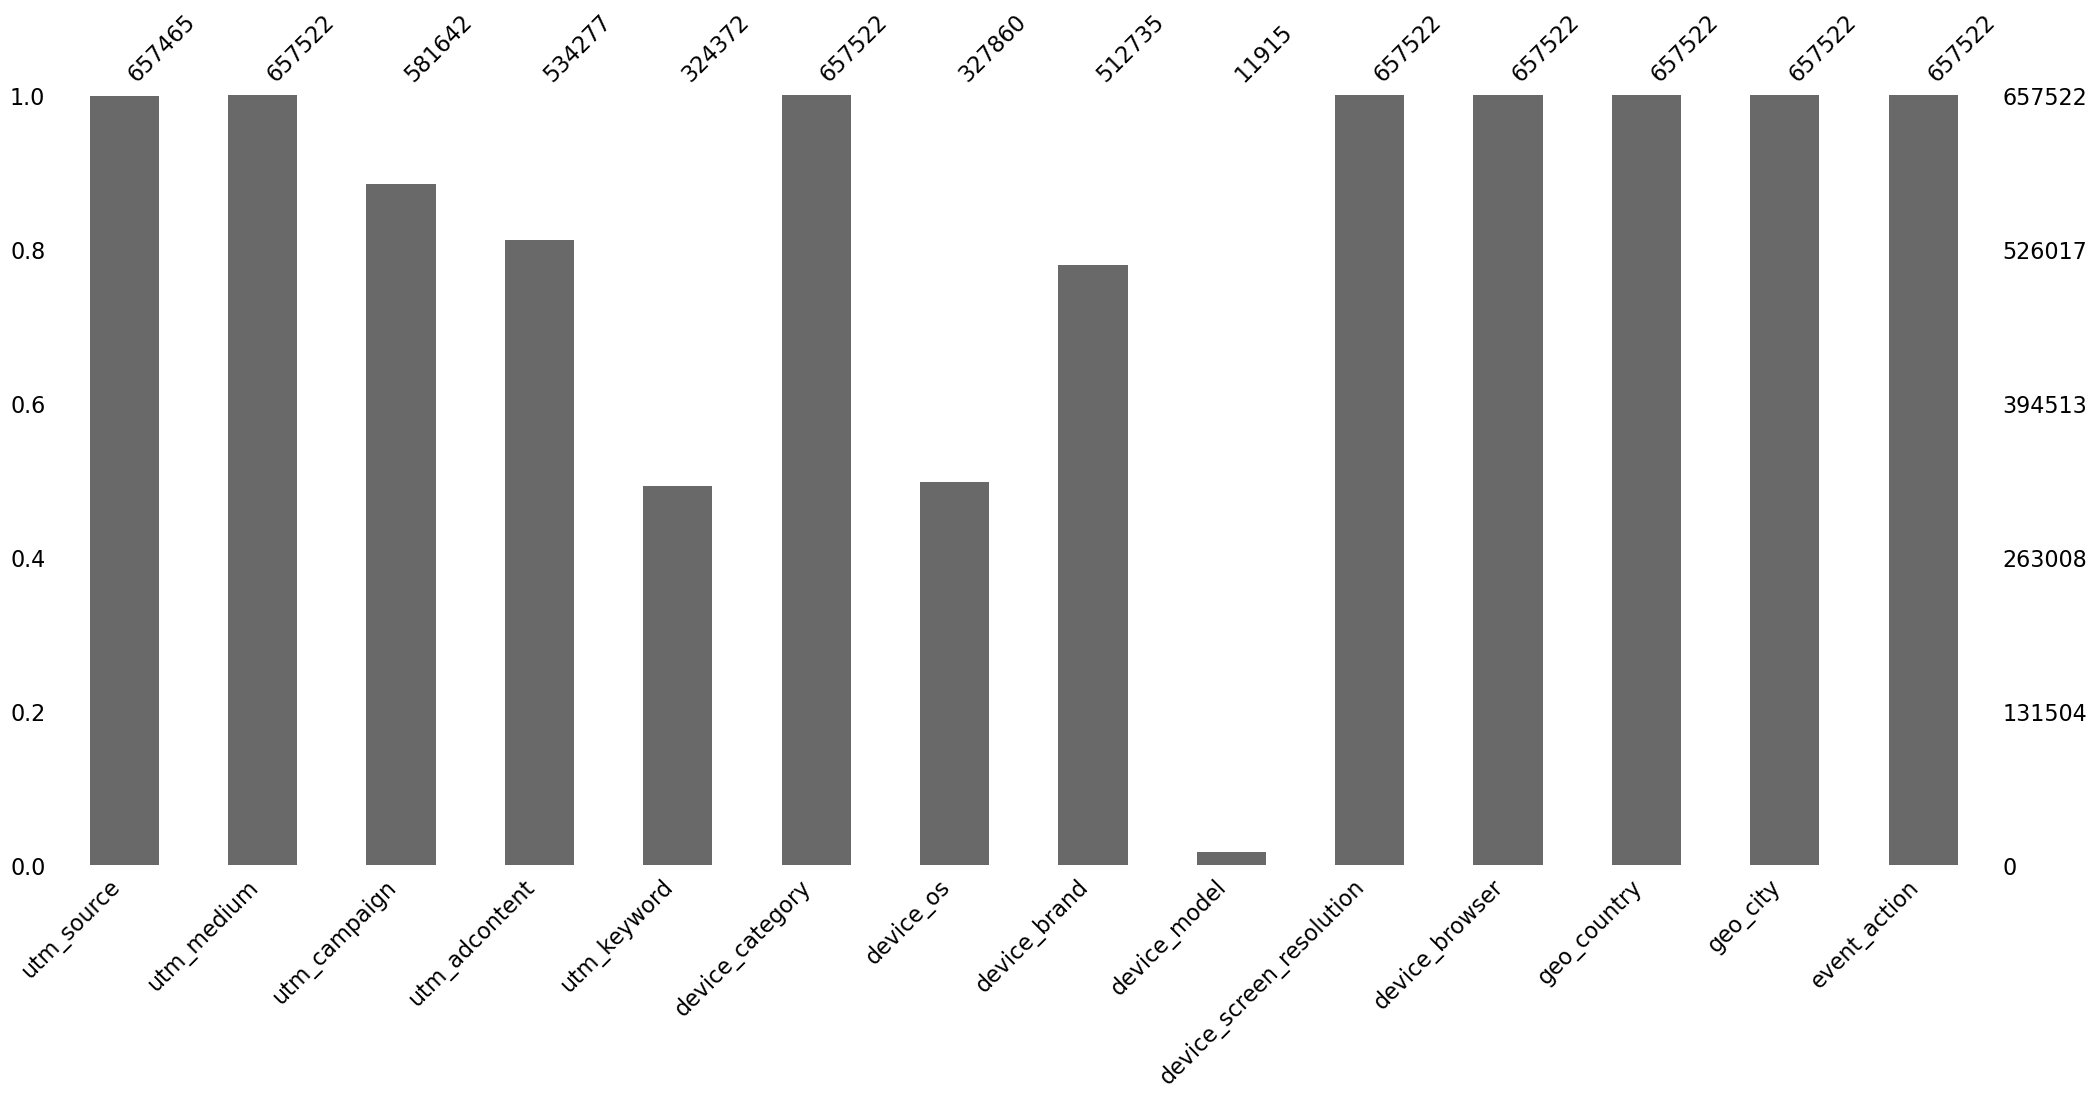

In [29]:
msno.bar(df_cleaned)

In [30]:
missing_values = ((df_cleaned.isna().sum() / len(df_cleaned)) * 100).sort_values()
print ('Percentage of missing values:')
missing_values

Percentage of missing values:


utm_medium                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event_action                 0.000000
utm_source                   0.008669
utm_campaign                11.540298
utm_adcontent               18.743860
device_brand                22.020100
device_os                   50.137030
utm_keyword                 50.667506
device_model                98.187893
dtype: float64

In [31]:
# Remove uninformative features with more than 25% missing values

In [32]:
df_cleaned = df_cleaned.drop(columns=['device_model', 'utm_keyword', 'device_os'])

In [33]:
missing_values = ((df_cleaned.isna().sum() / len(df_cleaned)) * 100).sort_values()
print ('Percentage of missing values:')
missing_values

Percentage of missing values:


utm_medium                   0.000000
device_category              0.000000
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
event_action                 0.000000
utm_source                   0.008669
utm_campaign                11.540298
utm_adcontent               18.743860
device_brand                22.020100
dtype: float64

In [34]:
def print_useful_rows_info(df):
    print('Number of fully completed rows in the dataset:', len(df.dropna()))
    print('Percentage of fully completed rows in the dataset:', round(len(df.dropna()) / len(df) * 100, 2))

In [35]:
print_useful_rows_info(df_cleaned)

Number of fully completed rows in the dataset: 420001
Percentage of fully completed rows in the dataset: 63.88


In [36]:
df_delete_cols = df_cleaned.copy()

In [37]:
# Missing values are still present, but now we are going to fill them

In [38]:
df_cleaned.device_brand.value_counts(dropna=False)

device_brand
NaN          144787
Samsung      129650
Apple        129141
Xiaomi        91370
Huawei        73896
              ...  
Cube              1
Star              1
Mobiistar         1
MTS               1
Maxvi             1
Name: count, Length: 201, dtype: int64

In [39]:
# It's possible that the missing values in device_brand are present in other columns

In [40]:
merged_df[merged_df['device_brand'].isna()][[
    'device_brand',
    'device_os',
    'device_category',
    'device_model',
    'device_screen_resolution',
    'device_browser'
]].head(50)

,device_brand,device_os,device_category,device_model,device_screen_resolution,device_browser
240,NaN,Windows,desktop,NaN,1536x864,Chrome
516,NaN,NaN,desktop,NaN,1920x1080,YaBrowser
518,NaN,NaN,desktop,NaN,1920x1080,Chrome
586,NaN,Windows,desktop,NaN,1920x1080,Chrome
681,NaN,NaN,desktop,NaN,1280x720,Chrome
685,NaN,NaN,desktop,NaN,1920x1080,Chrome
728,NaN,NaN,desktop,NaN,834x1112,Safari
779,NaN,Windows,desktop,NaN,1680x1050,Chrome
780,NaN,NaN,desktop,NaN,1920x1080,Chrome
812,NaN,NaN,desktop,NaN,1440x900,Safari


In [41]:
# Unfortunately, there are none, so we will fill them with a new value: 'other'

In [42]:
df_cleaned.device_brand = df_cleaned.device_brand.fillna('other')
df_cleaned.device_brand.isna().sum()

0

In [43]:
print_useful_rows_info(df_cleaned)

Number of fully completed rows in the dataset: 528076
Percentage of fully completed rows in the dataset: 80.31


In [44]:
# Continue filling in the missing values

In [45]:
df_cleaned.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    358393
NaN                     123245
vCIpmpaGBnIQhyYNkXqp     53380
xhoenQgDQsgfEPYNPwKO     42203
PkybGvWbaqORmxjNunqZ     13493
                         ...  
mxvgMizBAnQXeqzHjTwa         1
fiImkyBmzQSeAeQEVCDZ         1
uUDFLZnWKzkthhRGUTvb         1
vXARZToVDdvNhALiQtvl         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 281, dtype: int64

In [46]:
# Fill with a new value: 'other'

In [47]:
df_cleaned.utm_adcontent = df_cleaned.utm_adcontent.fillna('other')
df_cleaned.utm_adcontent.isna().sum()

0

In [48]:
print_useful_rows_info(df_cleaned)

Number of fully completed rows in the dataset: 581585
Percentage of fully completed rows in the dataset: 88.45


In [49]:
# Only the features utm_campaign and utm_source are left

In [50]:
df_cleaned.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    144547
LEoPHuyFvzoNfnzGgfcd     95735
FTjNLDyTrXaWYgZymFkV     76638
NaN                      75880
gecBYcKZCPMcVYdSSzKP     47551
                         ...  
AdtHYglxfCpTpwZeTAuW         1
qPDTdivQVeflLjTYIJnG         1
xVVRROBlkIufrdCBMTYc         1
HXlcbndflGLufMTnkOso         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 407, dtype: int64

In [51]:
# Fill with a new value: 'other'

In [52]:
df_cleaned.utm_campaign = df_cleaned.utm_campaign.fillna('other')
df_cleaned.utm_campaign.isna().sum()

0

In [53]:
df_cleaned.utm_source.value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    186114
kjsLglQLzykiRbcDiGcD    106191
fDLlAcSmythWSCVMvqvL     77181
MvfHsxITijuriZxsqZqt     60531
bByPQxmDaMXgpHeypKSM     49512
                         ...  
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
VdeFdoGCqZBxFfKSHNLl         1
oBixMNCffOQtQcLCZfRN         1
fRSoNoVhwXlxsbcAmZtb         1
Name: count, Length: 281, dtype: int64

In [54]:
# Fill with a new value: 'other'

In [55]:
df_cleaned.utm_source = df_cleaned.utm_source.fillna('other')
df_cleaned.utm_source.isna().sum()

0

In [56]:
print_useful_rows_info(df_cleaned)

Number of fully completed rows in the dataset: 657522
Percentage of fully completed rows in the dataset: 100.0


In [57]:
df_clean = df_cleaned.copy()

### Filter data

In [59]:
# Process values in the features that may be uninformative

In [60]:
# Replace such unique values with "other_*"

In [61]:
df_cleaned.geo_city.value_counts()

geo_city
Moscow              167766
Saint Petersburg     84059
(not set)            31386
Yekaterinburg        12865
Kazan                11769
                     ...  
Juuka                    1
Truckee                  1
Hazleton                 1
Terebovlya               1
Compiegne                1
Name: count, Length: 2389, dtype: int64

In [62]:
df_cleaned.geo_city.nunique()

2389

In [63]:
num_unique_cities = (df_cleaned.geo_city.value_counts() <= 1000).sum()
num_unique_cities

2296

In [64]:
target_values = [
    'sub_car_claim_click', 'sub_car_claim_submit_click',
    'sub_open_dialog_click', 'sub_custom_question_submit_click',
    'sub_call_number_click', 'sub_callback_submit_click',
    'sub_submit_success', 'sub_car_request_submit_click'
]

df_cleaned['event_action'] = df_cleaned['event_action'].apply(lambda x: 1 if x in target_values else 0)

In [65]:
df_try = df_cleaned.copy()

In [66]:
# Count the number of occurrences for each city
city_counts = df_try['geo_city'].value_counts()
    
df_try['city_category'] = df_try['geo_city'].apply(lambda x: 'Rare' if city_counts[x] <= 1000 else 'Frequent')
target_mean_by_category = df_try.groupby('city_category')['event_action'].mean().reset_index()

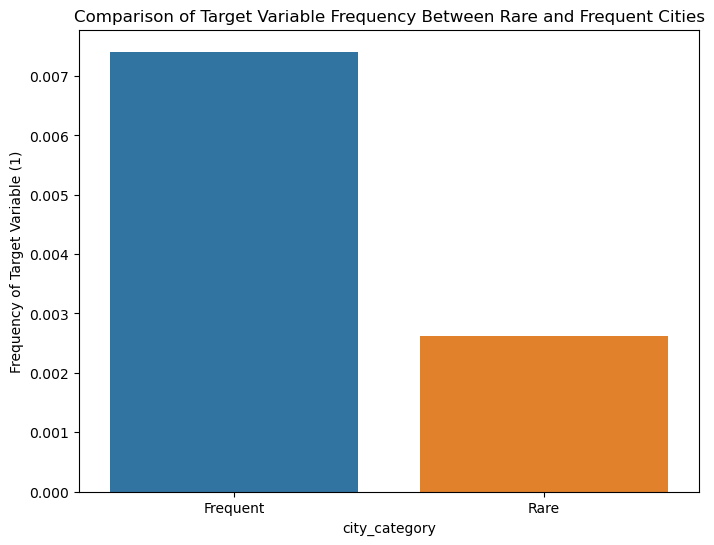

In [67]:
plt.figure(figsize=(8, 6))
sns.barplot(x='city_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent Cities')
plt.show()

In [68]:
target_mean_by_category

,city_category,event_action
0,Frequent,0.007409
1,Rare,0.002612


In [69]:
# Based on the analysis of the relationship between the target action and the frequency of city occurrences,
# we can conclude that rarely occurring cities tend to be associated with negative target outcomes.

# Therefore, I decided to remove unique city names that appear less than 5000 times
# and rename them all as 'other_cities'

In [70]:
df_try.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,city_category
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,Rare
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0,Frequent
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,Frequent
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,Frequent
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,Frequent


In [71]:
df_cleaned.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [72]:
df_cleaned.geo_city = df_cleaned.geo_city.apply(
    lambda x: 'other_cities' if city_counts[x] <= 1000 else x)

In [73]:
df_cleaned.geo_country.nunique()

159

In [74]:
df_cleaned.geo_country.value_counts().to_list()

[619037,
 6892,
 4746,
 2642,
 1799,
 1798,
 1597,
 1150,
 1107,
 1095,
 1059,
 867,
 816,
 777,
 737,
 643,
 617,
 521,
 520,
 499,
 428,
 375,
 364,
 326,
 317,
 295,
 286,
 274,
 250,
 249,
 246,
 237,
 229,
 226,
 221,
 208,
 191,
 187,
 185,
 160,
 152,
 149,
 145,
 131,
 128,
 124,
 123,
 119,
 117,
 110,
 101,
 99,
 93,
 92,
 86,
 77,
 73,
 64,
 64,
 55,
 55,
 53,
 52,
 52,
 48,
 46,
 46,
 40,
 40,
 38,
 37,
 31,
 28,
 27,
 27,
 25,
 24,
 24,
 22,
 22,
 22,
 21,
 21,
 17,
 17,
 16,
 15,
 15,
 14,
 13,
 13,
 13,
 12,
 11,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [75]:
num_unique_cities = (df_cleaned.geo_country.value_counts() <= 500).sum()
num_unique_cities

140

In [76]:
# Count the number of occurrences for each country
country_counts = df_try['geo_country'].value_counts()
    
df_try['country_category'] = df_try['geo_country'].apply(lambda x: 'Rare' if country_counts[x] <= 500 else 'Frequent')
target_mean_by_category = df_try.groupby('country_category')['event_action'].mean().reset_index()

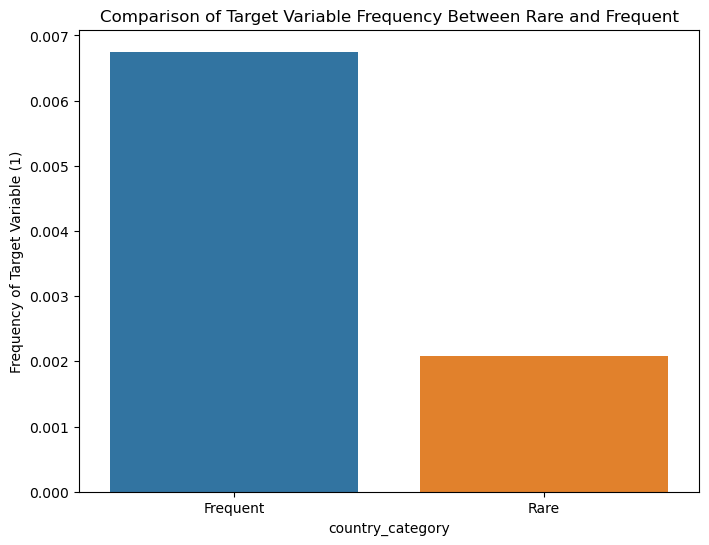

In [77]:
plt.figure(figsize=(8, 6))
sns.barplot(x='country_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [78]:
target_mean_by_category

,country_category,event_action
0,Frequent,0.006750
1,Rare,0.002087


In [79]:
df_cleaned.geo_country = df_cleaned.geo_country.apply(
    lambda x: 'other_countries' if country_counts[x] <= 500 else x)

In [80]:
df_cleaned.geo_country.value_counts()

geo_country
Russia             619037
other_countries      9102
Ukraine              6892
United States        4746
Belarus              2642
Kazakhstan           1799
Germany              1798
Turkey               1597
Uzbekistan           1150
United Kingdom       1107
Netherlands          1095
Sweden               1059
Ireland               867
(not set)             816
Georgia               777
Kyrgyzstan            737
France                643
Cyprus                617
Finland               521
Armenia               520
Name: count, dtype: int64

In [81]:
# utm_campaign             407
# utm_adcontent            281
# device_category            3
# device_brand             201
# device_browser            55

In [82]:
df_cleaned.utm_campaign.value_counts().to_list()

[144547,
 95735,
 76638,
 75880,
 47551,
 11077,
 10355,
 9205,
 9202,
 9075,
 8091,
 6849,
 6296,
 5804,
 5601,
 5330,
 4930,
 4683,
 4181,
 3902,
 3656,
 3642,
 3595,
 3114,
 2957,
 2820,
 2736,
 2572,
 2530,
 2448,
 2096,
 2096,
 2055,
 1892,
 1798,
 1736,
 1718,
 1662,
 1599,
 1590,
 1552,
 1535,
 1441,
 1376,
 1351,
 1288,
 1284,
 1254,
 1179,
 1175,
 1115,
 1086,
 1080,
 1078,
 1049,
 1046,
 1037,
 986,
 933,
 882,
 801,
 800,
 797,
 785,
 733,
 696,
 684,
 679,
 650,
 628,
 614,
 602,
 601,
 598,
 543,
 514,
 503,
 501,
 500,
 493,
 483,
 478,
 477,
 456,
 450,
 424,
 410,
 410,
 405,
 400,
 398,
 394,
 385,
 383,
 380,
 380,
 374,
 372,
 370,
 365,
 361,
 360,
 359,
 356,
 345,
 335,
 327,
 317,
 310,
 302,
 301,
 300,
 292,
 290,
 288,
 282,
 281,
 274,
 269,
 267,
 267,
 259,
 256,
 240,
 240,
 239,
 222,
 217,
 217,
 213,
 210,
 199,
 197,
 195,
 189,
 189,
 185,
 179,
 168,
 164,
 161,
 158,
 157,
 154,
 153,
 146,
 143,
 138,
 137,
 137,
 137,
 130,
 129,
 128,
 128,
 121,

In [83]:
num_unique_cities = (df_cleaned.utm_campaign.value_counts() <= 10).sum()
num_unique_cities

124

In [84]:
df_cleaned.utm_campaign.nunique()

407

In [85]:
utm_campaign_counts = df_try['utm_campaign'].value_counts()
    
df_try['utm_campaign_category'] = df_try['utm_campaign'].apply(lambda x: 'Rare' if utm_campaign_counts[x] <= 10 else 'Frequent')
target_mean_by_category = df_try.groupby('utm_campaign_category')['event_action'].mean().reset_index()

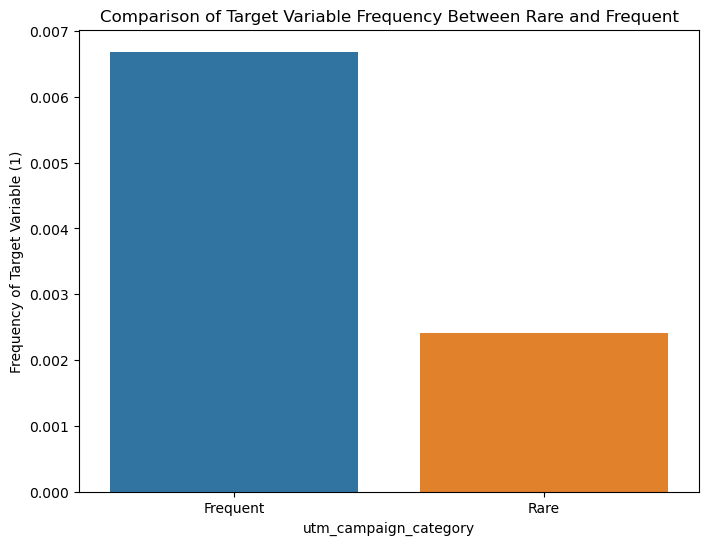

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot(x='utm_campaign_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [87]:
target_mean_by_category

,utm_campaign_category,event_action
0,Frequent,0.006688
1,Rare,0.002410


In [88]:
df_cleaned.utm_campaign = df_cleaned.utm_campaign.apply(
    lambda x: 'other_utm_campaign' if utm_campaign_counts[x] <= 10 else x)

In [89]:
df_cleaned.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    144547
LEoPHuyFvzoNfnzGgfcd     95735
FTjNLDyTrXaWYgZymFkV     76638
other                    75880
gecBYcKZCPMcVYdSSzKP     47551
                         ...  
pJnsGDvdAPPSfypxXruE        11
YpBKcihLLfFjWuxOLfvW        11
BHqsCPwtnpaQSryaVXya        11
vbDXvNFpmAgCDpNuuaPT        11
oVRrinVXnwQkBsdFlKCa        11
Name: count, Length: 284, dtype: int64

In [90]:
df_cleaned.utm_adcontent.value_counts().to_list()

[358393,
 123245,
 53380,
 42203,
 13493,
 8824,
 4053,
 3755,
 2887,
 2878,
 2830,
 2737,
 2453,
 2273,
 2271,
 2249,
 1870,
 1729,
 1583,
 1147,
 1100,
 1071,
 1061,
 740,
 740,
 729,
 666,
 626,
 582,
 564,
 529,
 523,
 517,
 500,
 475,
 447,
 409,
 395,
 392,
 391,
 389,
 383,
 378,
 357,
 322,
 317,
 309,
 306,
 304,
 296,
 292,
 288,
 285,
 256,
 247,
 245,
 244,
 244,
 222,
 196,
 190,
 167,
 160,
 146,
 134,
 130,
 126,
 120,
 119,
 119,
 111,
 106,
 97,
 94,
 94,
 90,
 89,
 86,
 85,
 85,
 81,
 81,
 76,
 65,
 65,
 64,
 59,
 55,
 53,
 50,
 48,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 38,
 37,
 37,
 37,
 35,
 35,
 33,
 32,
 30,
 29,
 28,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 22,
 22,
 21,
 21,
 21,
 19,
 19,
 18,
 18,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,

In [91]:
num_unique_cities = (df_cleaned.utm_adcontent.value_counts() <= 1).sum()
num_unique_cities

44

In [92]:
df_cleaned.utm_adcontent.nunique()

281

In [93]:
utm_adcontent_counts = df_try['utm_adcontent'].value_counts()
    
df_try['utm_adcontent_category'] = df_try['utm_adcontent'].apply(lambda x: 'Rare' if utm_adcontent_counts[x] <= 6 else 'Frequent')
target_mean_by_category = df_try.groupby('utm_adcontent_category')['event_action'].mean().reset_index()

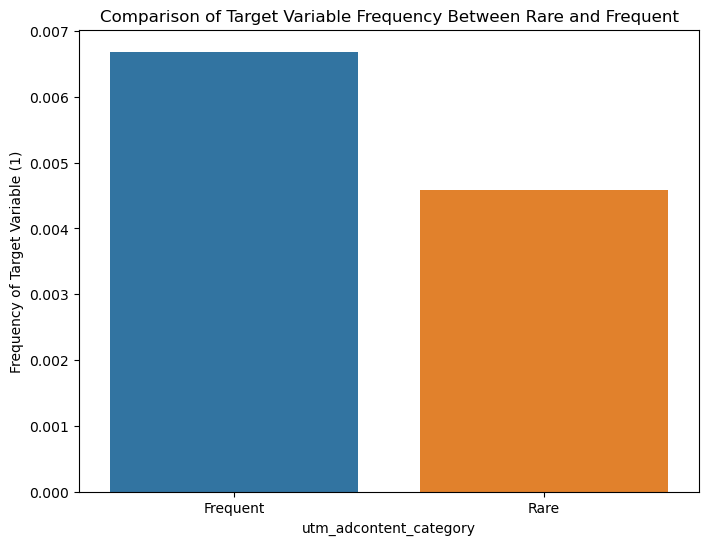

In [94]:
plt.figure(figsize=(8, 6))
sns.barplot(x='utm_adcontent_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [95]:
target_mean_by_category

,utm_adcontent_category,event_action
0,Frequent,0.006686
1,Rare,0.004587


In [96]:
df_cleaned.utm_adcontent = df_cleaned.utm_adcontent.apply(
    lambda x: 'other_utm_adcontent' if utm_adcontent_counts[x] <= 6 else x)

In [97]:
df_cleaned.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    358393
other                   123245
vCIpmpaGBnIQhyYNkXqp     53380
xhoenQgDQsgfEPYNPwKO     42203
PkybGvWbaqORmxjNunqZ     13493
                         ...  
ghufNFaaSqCETrIZcgal         7
JOEvyCPYuxSjvEyTgxpg         7
WaWpHWszYFymgCSbpGVL         7
KyMReDIldRzztqfDbJqp         7
tMYuXBrszdSagPhytmcp         7
Name: count, Length: 184, dtype: int64

In [98]:
df_cleaned.device_brand.value_counts().to_list()

[144787,
 129650,
 129141,
 91370,
 73896,
 12302,
 9105,
 7208,
 7056,
 6713,
 5557,
 5471,
 4262,
 4244,
 3341,
 2651,
 2486,
 2064,
 1827,
 1826,
 1722,
 1271,
 838,
 769,
 702,
 670,
 590,
 556,
 426,
 323,
 320,
 290,
 275,
 255,
 229,
 225,
 198,
 190,
 171,
 167,
 162,
 142,
 141,
 124,
 123,
 118,
 103,
 91,
 84,
 73,
 72,
 65,
 58,
 53,
 48,
 45,
 40,
 37,
 32,
 31,
 30,
 29,
 29,
 26,
 26,
 22,
 18,
 18,
 17,
 15,
 14,
 14,
 13,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [99]:
num_unique = (df_cleaned.device_brand.value_counts() <= 10).sum()
num_unique

121

In [100]:
df_cleaned.device_brand.nunique()

201

In [101]:
# Calculate the frequency of each city
device_brand_counts = df_try['device_brand'].value_counts()
    
df_try['device_brand_category'] = df_try['device_brand'].apply(lambda x: 'Rare' if device_brand_counts[x] <= 1 else 'Frequent')
target_mean_by_category = df_try.groupby('device_brand_category')['event_action'].mean().reset_index()

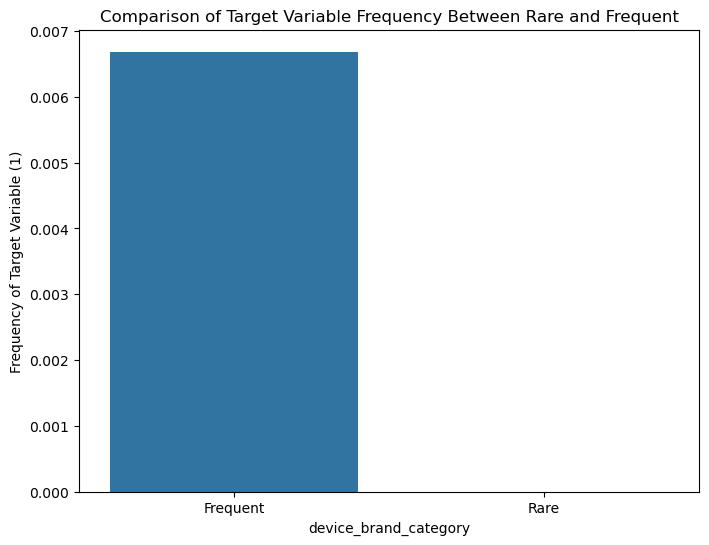

In [102]:
plt.figure(figsize=(8, 6))
sns.barplot(x='device_brand_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [103]:
target_mean_by_category

,device_brand_category,event_action
0,Frequent,0.006686
1,Rare,0.000000


In [104]:
df_cleaned.device_brand = df_cleaned.device_brand.apply(
    lambda x: 'other_device_brand' if device_brand_counts[x] <= 1 else x)

In [105]:
df_cleaned.device_brand.value_counts()

device_brand
other         144787
Samsung       129650
Apple         129141
Xiaomi         91370
Huawei         73896
               ...  
Land Rover         2
Corn               2
Krip               2
Dark               2
Dynamic            2
Name: count, Length: 156, dtype: int64

In [106]:
df_cleaned.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,other_cities,0
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [107]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   utm_source                657522 non-null  object
 1   utm_medium                657522 non-null  object
 2   utm_campaign              657522 non-null  object
 3   utm_adcontent             657522 non-null  object
 4   device_category           657522 non-null  object
 5   device_brand              657522 non-null  object
 6   device_screen_resolution  657522 non-null  object
 7   device_browser            657522 non-null  object
 8   geo_country               657522 non-null  object
 9   geo_city                  657522 non-null  object
 10  event_action              657522 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 60.2+ MB


In [108]:
df_cleaned.nunique()

utm_source                   281
utm_medium                    55
utm_campaign                 284
utm_adcontent                184
device_category                3
device_brand                 156
device_screen_resolution    4947
device_browser                55
geo_country                   20
geo_city                      94
event_action                   2
dtype: int64

In [109]:
# Now the number of unique values in each category has decreased

In [110]:
# All missing values have been handled and transformations have been applied to the columns

In [111]:
df_ready = df_cleaned.copy()

### Data transformation

In [113]:
df_ready.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,other_cities,0
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0


In [114]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   utm_source                657522 non-null  object
 1   utm_medium                657522 non-null  object
 2   utm_campaign              657522 non-null  object
 3   utm_adcontent             657522 non-null  object
 4   device_category           657522 non-null  object
 5   device_brand              657522 non-null  object
 6   device_screen_resolution  657522 non-null  object
 7   device_browser            657522 non-null  object
 8   geo_country               657522 non-null  object
 9   geo_city                  657522 non-null  object
 10  event_action              657522 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 60.2+ MB


In [115]:
df_ready.nunique()

utm_source                   281
utm_medium                    55
utm_campaign                 284
utm_adcontent                184
device_category                3
device_brand                 156
device_screen_resolution    4947
device_browser                55
geo_country                   20
geo_city                      94
event_action                   2
dtype: int64

In [116]:
# Convert all data to categorical format

In [117]:
df_ready = df_ready.astype('category')
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   utm_source                657522 non-null  category
 1   utm_medium                657522 non-null  category
 2   utm_campaign              657522 non-null  category
 3   utm_adcontent             657522 non-null  category
 4   device_category           657522 non-null  category
 5   device_brand              657522 non-null  category
 6   device_screen_resolution  657522 non-null  category
 7   device_browser            657522 non-null  category
 8   geo_country               657522 non-null  category
 9   geo_city                  657522 non-null  category
 10  event_action              657522 non-null  category
dtypes: category(11)
memory usage: 15.3 MB


In [118]:
df_transformed = df_ready.copy()

In [119]:
# At this stage, the EDA phase is complete

# Feature engineering 

In [121]:
# I'll start by creating two new variables based on device_screen_resolution

In [122]:
df_transformed['device_screen_width'] = df_transformed['device_screen_resolution'].apply(lambda x: int(x.split('x')[0]))

In [123]:
df_transformed['device_screen_height'] = df_transformed['device_screen_resolution'].apply(
    lambda x: int(x.split('x')[1]) if 'x' in x and len(x.split('x')) == 2 else 'other')

In [124]:
df_transformed.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,event_action,device_screen_width,device_screen_height
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,other_cities,0,360,720
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0,385,854
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,360,720
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,393,786
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0,393,786


In [125]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   utm_source                657522 non-null  category
 1   utm_medium                657522 non-null  category
 2   utm_campaign              657522 non-null  category
 3   utm_adcontent             657522 non-null  category
 4   device_category           657522 non-null  category
 5   device_brand              657522 non-null  category
 6   device_screen_resolution  657522 non-null  category
 7   device_browser            657522 non-null  category
 8   geo_country               657522 non-null  category
 9   geo_city                  657522 non-null  category
 10  event_action              657522 non-null  category
 11  device_screen_width       657522 non-null  int64   
 12  device_screen_height      657522 non-null  int64   
dtypes: category(11), int64(2)
memory

In [126]:
# Remove the now unnecessary feature device_screen_resolution

In [127]:
df_transformed = df_transformed.drop(columns=['device_screen_resolution'])

In [128]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   utm_source            657522 non-null  category
 1   utm_medium            657522 non-null  category
 2   utm_campaign          657522 non-null  category
 3   utm_adcontent         657522 non-null  category
 4   device_category       657522 non-null  category
 5   device_brand          657522 non-null  category
 6   device_browser        657522 non-null  category
 7   geo_country           657522 non-null  category
 8   geo_city              657522 non-null  category
 9   event_action          657522 non-null  category
 10  device_screen_width   657522 non-null  int64   
 11  device_screen_height  657522 non-null  int64   
dtypes: category(10), int64(2)
memory usage: 23.9 MB


In [129]:
df_transformed.utm_medium.value_counts()

utm_medium
banner               179958
cpc                  175915
(none)                77181
cpm                   74583
referral              72352
organic               23892
email                 15997
push                   8274
blogger_channel        6185
stories                4970
blogger_stories        3045
smartbanner            3004
tg                     2381
cpv                    2301
cpa                    1778
post                   1127
smm                     865
outlook                 788
app                     661
clicks                  612
blogger_header          573
(not set)               306
info_text               256
sms                     153
partner                  84
landing                  54
link                     35
yandex_cpc               26
vk_smm                   25
cbaafe                   21
CPM                      19
static                   17
google_cpc               15
article                  11
web_polka                10
fb_smm   

In [130]:
# Create two new features based on utm_medium, where ('organic', 'referral', '(none)') represent organic traffic,
# and everything else is considered paid traffic

In [131]:
df_transformed['free_trafic'] = df_transformed.utm_medium.apply(
    lambda x: 1 if x in ['organic', 'referral', '(none)'] else 0)

In [132]:
df_transformed['payed_trafic'] = df_transformed.utm_medium.apply(
    lambda x: 1 if x not in ['organic', 'referral', '(none)'] else 0)

In [133]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   utm_source            657522 non-null  category
 1   utm_medium            657522 non-null  category
 2   utm_campaign          657522 non-null  category
 3   utm_adcontent         657522 non-null  category
 4   device_category       657522 non-null  category
 5   device_brand          657522 non-null  category
 6   device_browser        657522 non-null  category
 7   geo_country           657522 non-null  category
 8   geo_city              657522 non-null  category
 9   event_action          657522 non-null  category
 10  device_screen_width   657522 non-null  int64   
 11  device_screen_height  657522 non-null  int64   
 12  free_trafic           657522 non-null  int64   
 13  payed_trafic          657522 non-null  int64   
dtypes: category(10), int64(4)
memory usage:

In [134]:
df_transformed.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,event_action,device_screen_width,device_screen_height,free_trafic,payed_trafic
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,other_cities,0,360,720,0,1
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,0,385,854,0,1
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,0,360,720,0,1
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,0,393,786,0,1
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,Chrome,Russia,Moscow,0,393,786,0,1


In [135]:
# Create two new features based on traffic from social media ads and non-social sources using utm_source

In [136]:
df_transformed['soc_mdeia_adv'] = df_transformed.utm_source.apply(
    lambda x: 1 if x in ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                         'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                         'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm') else 0)

In [137]:
df_transformed['other_adv'] = df_transformed.utm_source.apply(
    lambda x: 1 if x not in ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                         'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                         'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm') else 0)

In [138]:
df_transformed.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,event_action,device_screen_width,device_screen_height,free_trafic,payed_trafic,soc_mdeia_adv,other_adv
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,other_cities,0,360,720,0,1,0,1
2,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,0,385,854,0,1,1,0
3,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,0,360,720,0,1,0,1
19,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,0,393,786,0,1,0,1
22,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,Chrome,Russia,Moscow,0,393,786,0,1,0,1


In [139]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   utm_source            657522 non-null  category
 1   utm_medium            657522 non-null  category
 2   utm_campaign          657522 non-null  category
 3   utm_adcontent         657522 non-null  category
 4   device_category       657522 non-null  category
 5   device_brand          657522 non-null  category
 6   device_browser        657522 non-null  category
 7   geo_country           657522 non-null  category
 8   geo_city              657522 non-null  category
 9   event_action          657522 non-null  category
 10  device_screen_width   657522 non-null  int64   
 11  device_screen_height  657522 non-null  int64   
 12  free_trafic           657522 non-null  int64   
 13  payed_trafic          657522 non-null  int64   
 14  soc_mdeia_adv         657522 non-null  

In [140]:
df_transformed.nunique()

utm_source               281
utm_medium                55
utm_campaign             284
utm_adcontent            184
device_category            3
device_brand             156
device_browser            55
geo_country               20
geo_city                  94
event_action               2
device_screen_width     1166
device_screen_height    1079
free_trafic                2
payed_trafic               2
soc_mdeia_adv              2
other_adv                  2
dtype: int64

In [141]:
# Get rid of unnecessary columns

In [142]:
df_transformed = df_transformed.drop(columns=['utm_source', 'utm_medium'])

In [143]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657522 entries, 0 to 15685150
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   utm_campaign          657522 non-null  category
 1   utm_adcontent         657522 non-null  category
 2   device_category       657522 non-null  category
 3   device_brand          657522 non-null  category
 4   device_browser        657522 non-null  category
 5   geo_country           657522 non-null  category
 6   geo_city              657522 non-null  category
 7   event_action          657522 non-null  category
 8   device_screen_width   657522 non-null  int64   
 9   device_screen_height  657522 non-null  int64   
 10  free_trafic           657522 non-null  int64   
 11  payed_trafic          657522 non-null  int64   
 12  soc_mdeia_adv         657522 non-null  int64   
 13  other_adv             657522 non-null  int64   
dtypes: category(8), int64(6)
memory usage: 

In [144]:
df_transformed.event_action.value_counts()

event_action
0    653126
1      4396
Name: count, dtype: int64

In [145]:
# Next, we can proceed to building the actual model